In [39]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG 
from sknetwork.visualization import svg_graph, svg_digraph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [40]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_digraph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_digraph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# Types of Graphs: Part 1

Yesterday, we were able to use the Network Analysis network to create a learning curriculum. We will likely do that again, during this #100daysofnetworks adventures, to learn more and more to learn about. Basically, we can use that to identify gaps in our knowledge, and then we can learn those concepts. Today, we are going to learn about five different types of graphs, and look at some of their characteristics. 

We will look at:
- Cycle graphs
- Dense graphs
- Sparse graphs
- Regular graphs
- Wheel graphs

In practice, I tend to not think of these names when I am doing network analysis, as I am jumping between sections, excploring commmunities, looking at ego networks, identifying important nodes, etc. But this is useful to understand because THERE ARE different types of graphs, and they have unique characteristics. 

Often, in practice, I will see these types of graphs in subgraphs, or in cores, or in communities, but it is extremely rare that a network I analyze will be wheel graph, for instance. 

But this is useful knowledge, and it is good to have a common vocabulary.

I am using ChatGPT to make short work of summarization. As always, if you use a LLM, you should verify that it has given you the correct answer. You can see what I did here: https://chat.openai.com/share/04278943-07d5-4568-ad78-2f23c3e18c3e

We could build some of these with NetworkX graph generators, but I am doing this manually so that you can understand more easily.

I am using an older version of scikit-network. In newer versions, you can indicate whether a graph is directed or undirected, and it will render as such. In this version, I'd have to create two separate functions, so just note that in an undirected network, the arrows go both ways (and they do), and in a directed network, edges are often in a single direction, like a one-way street

## Cycle Graphs

A cycle graph is a type of graph in network science that forms a simple cycle, which is a closed path where each node is connected to exactly two neighbors except for the first and last nodes, which are connected to each other. Cycle graphs are fundamental structures in graph theory and are often used to model cyclic processes, circuits, and other scenarios with repeating patterns.

Example: A -> B -> C -> D -> A

You can learn more at https://en.wikipedia.org/wiki/Cycle_graph

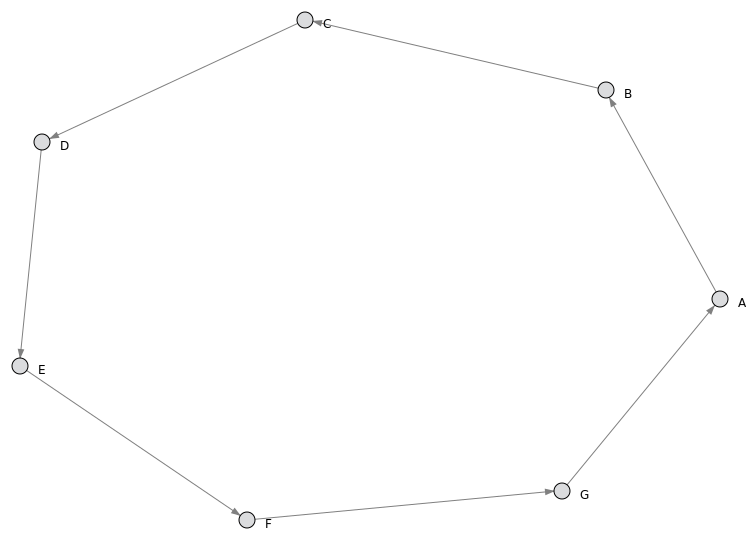

In [41]:
edges = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GA']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.DiGraph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

### Density
A maximum density of 1.0 would indicate that every single node has an edge (is connected to) with every single other node in the network. In this graph, nodes are only connected with the node in front of them. It is a one-way street. So, the density score will be low, but it will not be 0.0. A minimal density of 0.0 would indicate that no nodes are connected with any other nodes in the network. 

In [42]:
nx.density(G)

0.16666666666666666

### Betweenness Centrality
Betweenness Centrality shows which nodes sit between other nodes. Nodes with higher betweenness centrality values sit on the shortest path of more nodes than nodes with low betweenenness centrality values.

In [43]:
nx.betweenness_centrality(G)

{'A': 0.5, 'B': 0.5, 'C': 0.5, 'D': 0.5, 'E': 0.5, 'F': 0.5, 'G': 0.5}

There's no point even visualizing this. Every single node has an identical betweenenss centrality value, because every single node sits between one node and another node.

### Degree Centrality
Degree Centrality has to do with the number of edges a node has. It is a simple measure and has nothing to do with whether a node sits on a shortest path. It only cares about the degrees (edges) a node has. In this case, every node has the same number of edges, so their degree centrality will be identical.

In [44]:
nx.degree_centrality(G)

{'A': 0.3333333333333333,
 'B': 0.3333333333333333,
 'C': 0.3333333333333333,
 'D': 0.3333333333333333,
 'E': 0.3333333333333333,
 'F': 0.3333333333333333,
 'G': 0.3333333333333333}

We can also see this by looking at the degrees of a Graph. You can use either of these two approaches.

In [45]:
G.degree

DiDegreeView({'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2})

In [46]:
nx.degree(G)

DiDegreeView({'A': 2, 'B': 2, 'C': 2, 'D': 2, 'E': 2, 'F': 2, 'G': 2})

### Shortest Paths
Because of the cyclic nature of the graph, the shortest path from A to C will be much shorter than from E to C. Think about this and it will become intuitive.

In [47]:
nx.shortest_path(G, 'A', 'C')

['A', 'B', 'C']

In [48]:
nx.shortest_path(G, 'E', 'C')

['E', 'F', 'G', 'A', 'B', 'C']

## Dense Graphs

A dense graph is a type of graph in network science where most of the possible edges are present, resulting in a high density of connections between nodes. In a dense graph, the number of edges is close to the maximum possible for the given number of nodes. Dense graphs are often used to model scenarios where interactions or relationships between entities are widespread and frequent.

You can learn more at https://en.wikipedia.org/wiki/Dense_graph

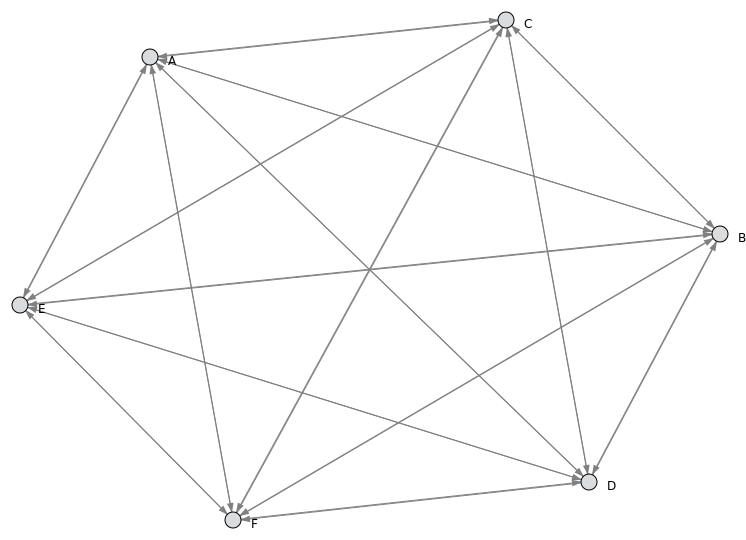

In [49]:
edges = ['AB', 'AC', 'AD', 'AE', 'AF', 'BC', 'BD', 'BE', 'BF', 'CD', 'CE', 'CF', 'DE', 'DF', 'EF']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.Graph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

### Density
Unlike the cycle graph, in a dense graph, most nodes are linked to most other nodes. In this case, ALL nodes are linked to other nodes. If we wanted to experiment with density values, we could drop one of the edges and see how that affects density. Please experiment!

A density of 1.0 indicates that all nodes have edges (links) to all other nodes.

In [50]:
nx.density(G)

1.0

### Betweenness Centrality
As with the cycle graph, all nodes have an identical betweenness centrality. However, unlike the cycle graph, the betweenness centrality value is 0.0 instead of 0.5.

In [51]:
nx.betweenness_centrality(G)

{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0}

### Degree Centrality
Each node has five edges, and each node has an identical degree centrality. Even though this is a very different kind of graph than a cycle graph, the degree centrality is uniform across nodes in the graph, as it was in a cycle graph.

In [52]:
nx.degree_centrality(G)

{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0, 'E': 1.0, 'F': 1.0}

In [53]:
G.degree

DegreeView({'A': 5, 'B': 5, 'C': 5, 'D': 5, 'E': 5, 'F': 5})

### Shortest Paths
Take note that the shortest paths are very different in this kind of graph vs a cycle graph. In a cycle graph, it takes much longer to go from node E to node C. In this dense graph, node C is an equal distance from nodes A and E.

This has implications in communications and in network resiliency. You can bolster your network by making it more dense.

In [54]:
nx.shortest_path(G, 'A', 'C')

['A', 'C']

In [55]:
nx.shortest_path(G, 'E', 'C')

['E', 'C']

## Sparse Graphs
You can learn more on the Dense graph page, but a sparse graph is just a graph where nodes have very few edges.

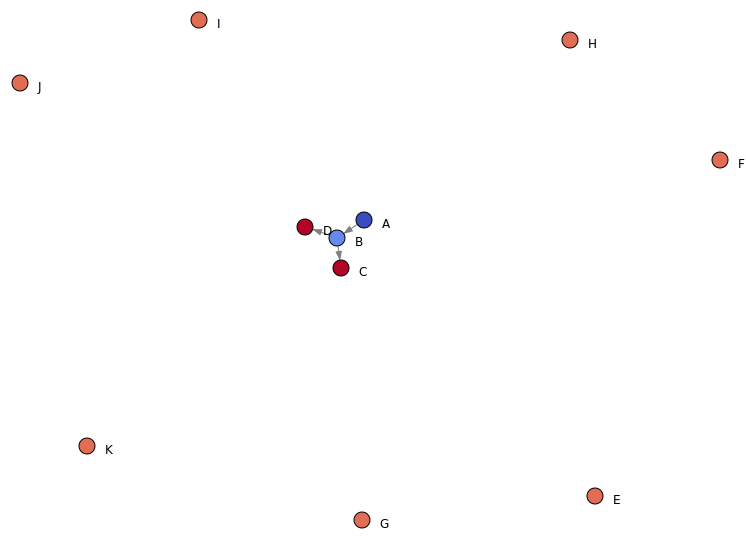

In [56]:
G = nx.DiGraph()

G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'])
G.add_edges_from([('A', 'B'), ('B', 'C'), ('B', 'D')])

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

### Density

Look at the density score of this graph. 0.027, where the fully connected graph had a density of 1.0. I made this sparse graph look closer to what I often see in real-world datasets, allowing a few connections to exist, making this a bit more interesting than completely isolated dots.

In [57]:
nx.density(G)

0.02727272727272727

### Betweenness Centrality
Pay close attention to the code and arrows on the visualization and you'll realize that this is a directed graph. In this graph, only one node sits between other nodes, and that is node B. A has an edge with B, and B has edges with C and D. So, only one of these nodes will have a betweenness centrality value, and the rest will be zero. You can use betweenness centrality to identify important nodes, and it did just that.

In [58]:
nx.betweenness_centrality(G)

{'A': 0.0,
 'B': 0.022222222222222223,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0,
 'I': 0.0,
 'J': 0.0,
 'K': 0.0}

### Degree Centrality
In this graph, degree centrality actually showed to be a bit more informative than betweenness centrality, which is why it is useful to know about several different centralities and where they can be useful and how they differ. Degree centrality gave the highest value to B (just like betweenness centrality), but it also identified nodes A, C, and D as having some importance, as they are connected.

In [59]:
nx.degree_centrality(G)

{'A': 0.1,
 'B': 0.30000000000000004,
 'C': 0.1,
 'D': 0.1,
 'E': 0.0,
 'F': 0.0,
 'G': 0.0,
 'H': 0.0,
 'I': 0.0,
 'J': 0.0,
 'K': 0.0}

### Shortest Paths
Shortest paths identified another key difference between the other graphs. This is a directed network, and it is sparsely connected. As it is sparsely connected, information cannot flow from certain nodes to other nodes. Look below and you will see that there is a shortest path between nodes A and C, but there is no path whatsoever between nodes E and C. You can see that in the visualization as well!

In [60]:
nx.shortest_path(G, 'A', 'C')

['A', 'B', 'C']

In [61]:
nx.shortest_path(G, 'E', 'C')

NetworkXNoPath: No path between E and C.

## Regular Graphs

A regular graph is a type of graph in network science where each node has the same number of connections or edges. In other words, all nodes in a regular graph have the same degree. Regular graphs are often studied for their uniform connectivity patterns and symmetry.

You can learn more at https://en.wikipedia.org/wiki/Regular_graph

Our Dense Graph was an example of a regular graph, but I will make another one for this demonstration. No harm in seeing something twice. You'll see a lot of familiar shapes the more network analysis you do.

Forget everything you know about dense graphs and pretend you just learned about regular graphs. Try to anticipate density, betweenness centrality, and shortest paths.

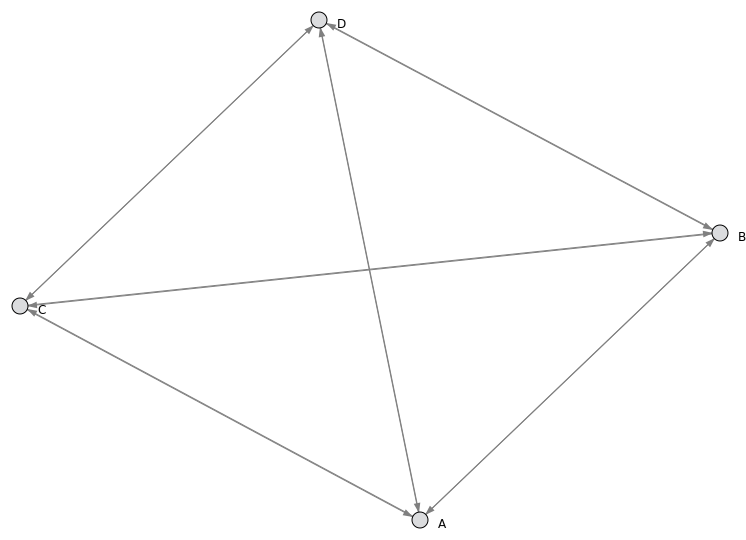

In [62]:
edges = ['AB', 'AC', 'AD', 'BC', 'BD', 'CD']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.Graph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

### Density

In [63]:
nx.density(G)

1.0

### Betweenness Centrality

In [64]:
nx.betweenness_centrality(G)

{'A': 0.0, 'B': 0.0, 'C': 0.0, 'D': 0.0}

### Degree Centrality

In [65]:
nx.degree_centrality(G)

{'A': 1.0, 'B': 1.0, 'C': 1.0, 'D': 1.0}

In [66]:
G.degree

DegreeView({'A': 3, 'B': 3, 'C': 3, 'D': 3})

### Shortest Paths

In [67]:
nx.shortest_path(G, 'A', 'D')

['A', 'D']

In [68]:
nx.shortest_path(G, 'B', 'D')

['B', 'D']

## Wheel Graphs

A wheel graph is identical to a cycle graph, but each of the outer nodes links to an inner node, creating what looks like a wheel.

You can learn more at https://en.wikipedia.org/wiki/Wheel_graph

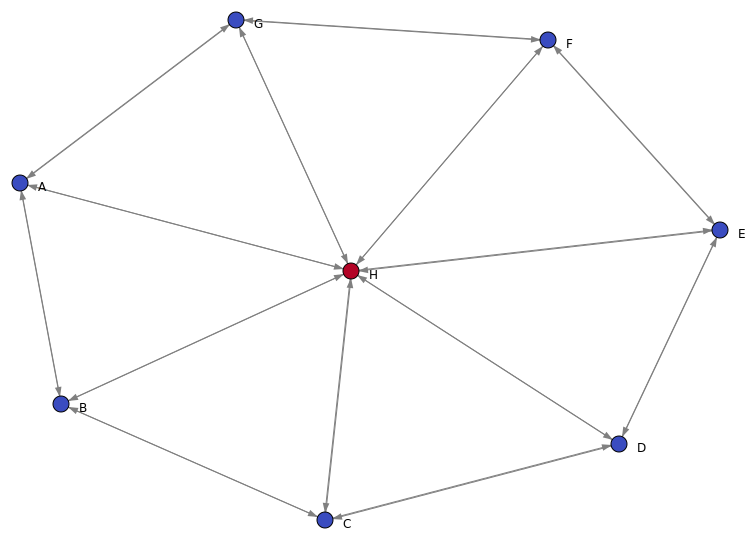

In [69]:
edges = ['AB', 'BC', 'CD', 'DE', 'EF', 'FG', 'GA', 'AH', 'BH', 'CH', 'DH', 'EH', 'FH', 'GH']

edgelist = [(e[0],e[1]) for e in edges]

G = nx.from_edgelist(edgelist, create_using=nx.Graph)

draw_graph(G, show_names=True, node_size=8, font_size=12, edge_width=1)

### Density
Take note of the difference in density between this graph and other graphs! It's not a 1.0, because all nodes are NOT connected. All nodes are connected to a single node, but all nodes are not connected with each other. This is not a dense graph, but it is also not a sparse graph.

In [70]:
nx.density(G)

0.5

### Betweenness Centrality
In this graph, one single node sits between every other node in the network, but other nodes also sit between other nodes. So, the one VISIBLY CENTRAL node has a 25x higher betweenness centrality score, roughly. You could say that it is 25x more important than the other nodes, by positioning alone.

In [71]:
nx.betweenness_centrality(G)

{'A': 0.023809523809523808,
 'B': 0.023809523809523808,
 'C': 0.023809523809523808,
 'D': 0.023809523809523808,
 'E': 0.023809523809523808,
 'F': 0.023809523809523808,
 'G': 0.023809523809523808,
 'H': 0.5}

### Degree Centrality
Degree centrality found node H to be most important, with a value more than twice as high as other nodes. If this were a communication network, I would say that betweenness centrality paints a better picture, because the middle node allows communication between every node, where that was not the case in a cycle graph (scroll to top to see). This will affect shortest paths as well!

In [72]:
nx.degree_centrality(G)

{'A': 0.42857142857142855,
 'B': 0.42857142857142855,
 'C': 0.42857142857142855,
 'D': 0.42857142857142855,
 'E': 0.42857142857142855,
 'F': 0.42857142857142855,
 'G': 0.42857142857142855,
 'H': 1.0}

### Shortest Paths
The shortest path will have to do with where nodes are positioned in the graph, but the central node allows quick communication from nodes on one side of a graph to nodes on the other side. Look at the visualization and look at noces A and E. Notice how far apart they are, and how far they'd have to go if node H had not been placed in the middle. Node H's placement is an optimization for this network, in terms of information flow.

In [73]:
nx.shortest_path(G, 'A', 'E')

['A', 'H', 'E']

In [74]:
nx.shortest_path(G, 'B', 'F')

['B', 'H', 'F']

In [75]:
nx.shortest_path(G, 'A', 'B')

['A', 'B']

In [76]:
nx.shortest_path(G, 'A', 'C')

['A', 'B', 'C']

# That's all for today!
Yesterday, we used a graph to create a learning path for us to learn more about network science, and today we created and analyzed five different kinds of graphs! I hope you enjoyed this. We will do more!

It might be cool, one day, to make some neat learning visualizations of different graph types!